<a href="https://colab.research.google.com/github/JSJeong-me/RPA-2023/blob/main/Time_Series/GPT-ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gdown


In [4]:
import gdown

file_id = "18Qr23SUFtJ-jBPw76v_YkE0CgAI8Df0U"
url = f"https://drive.google.com/uc?id={file_id}"
output = "datapower_demand_dataset.xlsx"
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=18Qr23SUFtJ-jBPw76v_YkE0CgAI8Df0U
To: /content/datapower_demand_dataset.xlsx
100%|██████████| 2.11M/2.11M [00:00<00:00, 53.5MB/s]


'datapower_demand_dataset.xlsx'

In [5]:
import pandas as pd

data = pd.read_excel("datapower_demand_dataset.xlsx")
print(data.head())


   Unnamed: 0.1  Unnamed: 0   Time   Value  Max Value        Date  \
0             0           0  00:15  135.12     540.48  2019-03-01   
1             1           1  00:30  131.28     525.12  2019-03-01   
2             2           2  00:45  129.60     518.40  2019-03-01   
3             3           3  01:00  126.48     505.92  2019-03-01   
4             4           4  01:15  123.36     493.44  2019-03-01   

                   TS  
0 2019-03-01 00:15:00  
1 2019-03-01 00:30:00  
2 2019-03-01 00:45:00  
3 2019-03-01 01:00:00  
4 2019-03-01 01:15:00  


In [6]:
import pandas as pd

# Assuming you've already read the data into the dataframe named 'data'
# If not, you can read it again using:
# data = pd.read_excel("datapower_demand_dataset.xlsx")

# 1. Get the dimension of the dataframe
print("Dimensions of the dataframe:", data.shape)

# 2. Descriptive statistics on the columns
print("\nDescriptive Statistics:")
print(data.describe())

# 3. Data types of various columns
print("\nData Types of Columns:")
print(data.dtypes)


Dimensions of the dataframe: (53567, 7)

Descriptive Statistics:
       Unnamed: 0.1    Unnamed: 0         Value     Max Value
count  53567.000000  53567.000000  53567.000000  53567.000000
mean   26783.000000     47.499113    188.087015    752.348059
std    15463.605272     27.711067     63.083298    252.333190
min        0.000000      0.000000     26.400000    105.600000
25%    13391.500000     23.500000    138.240000    552.960000
50%    26783.000000     47.000000    178.560000    714.240000
75%    40174.500000     71.000000    225.120000    900.480000
max    53566.000000     95.000000    393.360000   1573.440000

Data Types of Columns:
Unnamed: 0.1             int64
Unnamed: 0               int64
Time                    object
Value                  float64
Max Value              float64
Date                    object
TS              datetime64[ns]
dtype: object


In [7]:
# Number of missing values in each column
missing_values = data.isna().sum()
print("Number of missing values in each column:\n", missing_values)


Number of missing values in each column:
 Unnamed: 0.1    0
Unnamed: 0      0
Time            0
Value           0
Max Value       0
Date            0
TS              0
dtype: int64


In [11]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'Value', 'Max Value', 'Date'], dtype='object')

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'Value', 'Max Value', 'Date'], dtype='object')


<ipython-input-13-bb0718330d94>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_resampled = data.resample('D').mean()  # Modify 'D' as needed


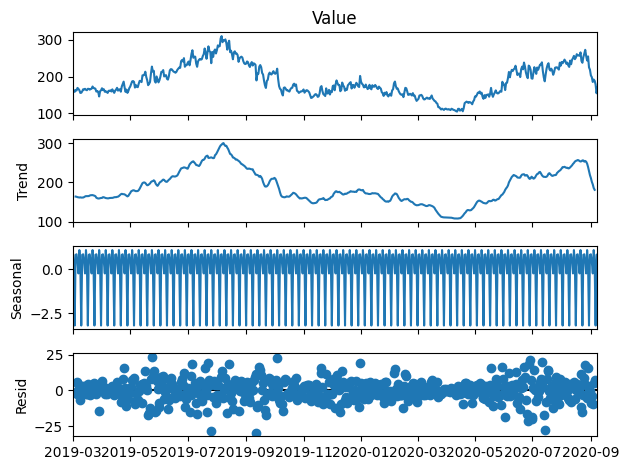

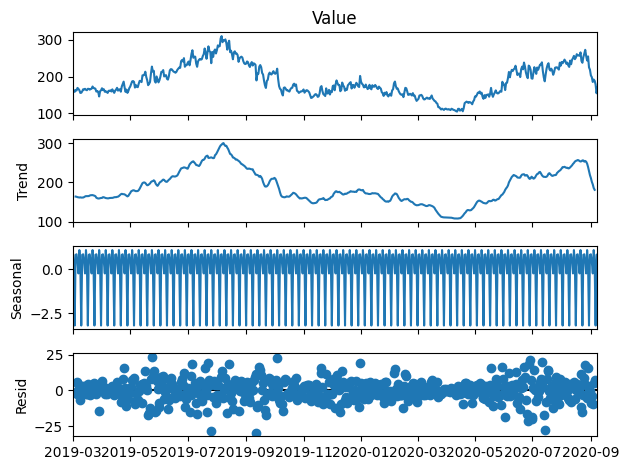

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you've already read the data into the dataframe named 'data'
# If not, you can read it again using:
# data = pd.read_excel("datapower_demand_dataset.xlsx")

# Set the 'TS' column as the index
#data.set_index('TS', inplace=True)

# Ensure the index is a datetime type
data.index = pd.to_datetime(data.index)

# Check column names
print(data.columns)

# Or, if you want to resample:
data_resampled = data.resample('D').mean()  # Modify 'D' as needed

# Perform ETS decomposition on the resampled data
result = seasonal_decompose(data_resampled['Value'], model='additive')  # Replace 'ValueColumn' with your column name

# Plot the decomposed components
result.plot()
plt.show()

result.plot()
plt.show()



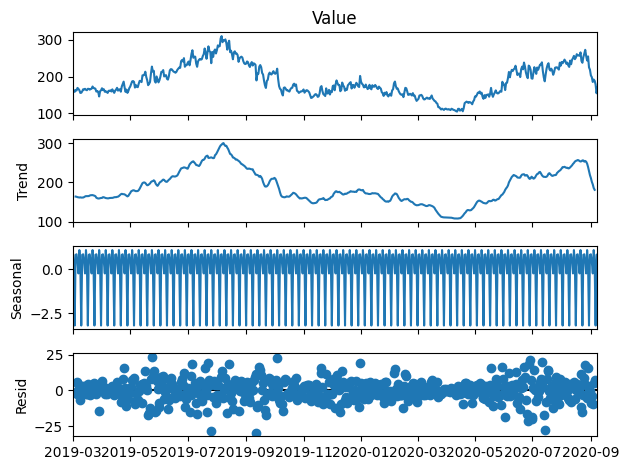

In [16]:
# Plot the decomposed components
fig = result.plot()

# Save the plot to a file
fig.savefig('decomposed_ets_plot.png', dpi=300, bbox_inches='tight')